In [1]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 2. Load dữ liệu CIFAR10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_val, y_val = X_train[40000:50000,:], y_train[40000:50000]
X_train, y_train = X_train[:40000,:], y_train[:40000]
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

170508288/170498071 [==============================] - 2s 0us/step
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

X_train = X_train/255.
X_test = X_test/255.
X_val = X_val/255.
# print(X_test.shape)
# print(X_val)

In [7]:
# 4. One hot encoding label (Y)

Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train)
print('Dữ liệu y sau one-hot encoding ',Y_train)

Dữ liệu y ban đầu  [[6]
 [9]
 [9]
 ...
 [6]
 [2]
 [8]]
Dữ liệu y sau one-hot encoding  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [6]:
# ----------------------Mạng CNN----------------
# BatchNormalization()
# Init Weight ()

# 5. Định nghĩa model
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

# Thêm Max pooling layer
model.add(MaxPooling2D())

# Thêm Convolutional layer
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

# Thêm Max pooling layer
model.add(MaxPooling2D())

# # Thêm Convolutional layer
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

# # Thêm Max pooling layer
# model.add(MaxPooling2D())

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                81930     
Total params: 157,578
Trainable params: 157,578
Non-trainable params: 0
__________________________________________________

In [7]:
# 7. Thực hiện train model với data
x =model.fit(X_train, Y_train,batch_size=32, epochs=10, verbose=2)
y= model.fit(X_test, Y_test,batch_size=32, epochs=10, verbose=2)
z= model.fit(X_val, Y_val,batch_size=32, epochs=10, verbose=2)
print(x.history)
print(y.history)
print(z.history)

Epoch 1/10
1250/1250 - 34s - loss: 1.3976 - accuracy: 0.5050
Epoch 2/10
1250/1250 - 3s - loss: 1.0184 - accuracy: 0.6488
Epoch 3/10
1250/1250 - 3s - loss: 0.8858 - accuracy: 0.6933
Epoch 4/10
1250/1250 - 3s - loss: 0.7902 - accuracy: 0.7273
Epoch 5/10
1250/1250 - 3s - loss: 0.7117 - accuracy: 0.7544
Epoch 6/10
1250/1250 - 3s - loss: 0.6397 - accuracy: 0.7789
Epoch 7/10
1250/1250 - 3s - loss: 0.5794 - accuracy: 0.8000
Epoch 8/10
1250/1250 - 3s - loss: 0.5230 - accuracy: 0.8195
Epoch 9/10
1250/1250 - 3s - loss: 0.4700 - accuracy: 0.8375
Epoch 10/10
1250/1250 - 3s - loss: 0.4256 - accuracy: 0.8532
Epoch 1/10
313/313 - 1s - loss: 0.9256 - accuracy: 0.6927
Epoch 2/10
313/313 - 1s - loss: 0.6804 - accuracy: 0.7700
Epoch 3/10
313/313 - 1s - loss: 0.5437 - accuracy: 0.8116
Epoch 4/10
313/313 - 1s - loss: 0.4376 - accuracy: 0.8496
Epoch 5/10
313/313 - 1s - loss: 0.3406 - accuracy: 0.8878
Epoch 6/10
313/313 - 1s - loss: 0.2613 - accuracy: 0.9182
Epoch 7/10
313/313 - 1s - loss: 0.1969 - accuracy:

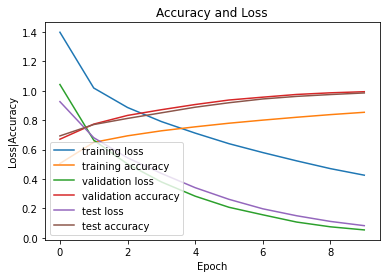

In [8]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), x.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), x.history['accuracy'], label='training accuracy')
plt.plot(np.arange(0, numOfEpoch), z.history['loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), z.history['accuracy'], label='validation accuracy')
plt.plot(np.arange(0, numOfEpoch), y.history['loss'], label='test loss')
plt.plot(np.arange(0, numOfEpoch), y.history['accuracy'], label='test accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [9]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=2)
print(score)

313/313 - 1s - loss: 0.5122 - accuracy: 0.8372
[0.5122361779212952, 0.8371999859809875]


ảnh dự đoán là:


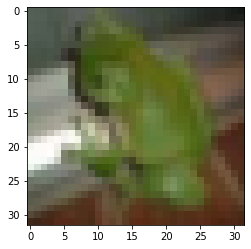

In [10]:
plt.imshow(X_test[7].reshape(32,32,3))
# y_predict = model.predict(X_test[7].reshape(1,32,32,3))

print('ảnh dự đoán là:')